In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv('Classified Data',index_col=0)

In [6]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [8]:
X=df.drop('TARGET CLASS',axis=1)
Y=df["TARGET CLASS"]

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X_TRAIN,X_TEST, Y_TRAIN,Y_TEST = train_test_split(X,Y,test_size=0.30)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
kn=KNeighborsClassifier(n_neighbors=1)

In [21]:
kn.fit(X_TRAIN,Y_TRAIN)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [22]:
predicted_1=kn.predict(X_TEST)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(confusion_matrix(Y_TEST,predicted_1))
print(classification_report(Y_TEST,predicted_1))

[[145  16]
 [  9 130]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       161
           1       0.89      0.94      0.91       139

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [29]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [30]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [35]:
df_new=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_new.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [37]:
x_train,x_test,y_train,y_test=train_test_split(df_new,df['TARGET CLASS'],test_size=0.30)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
predicted_2=knn.predict(x_test)
print(confusion_matrix(y_test,predicted_2))
print(classification_report(y_test,predicted_2))

[[129  13]
 [ 12 146]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       142
           1       0.92      0.92      0.92       158

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [59]:
error_rate=[]
for i in range(1,41):
    KN=KNeighborsClassifier(n_neighbors=i)
    KN.fit(x_train,y_train)
    final_predictions=KN.predict(x_test)
    error_rate.append(np.mean(final_predictions!=y_test))

Text(0, 0.5, 'ERROR RATE')

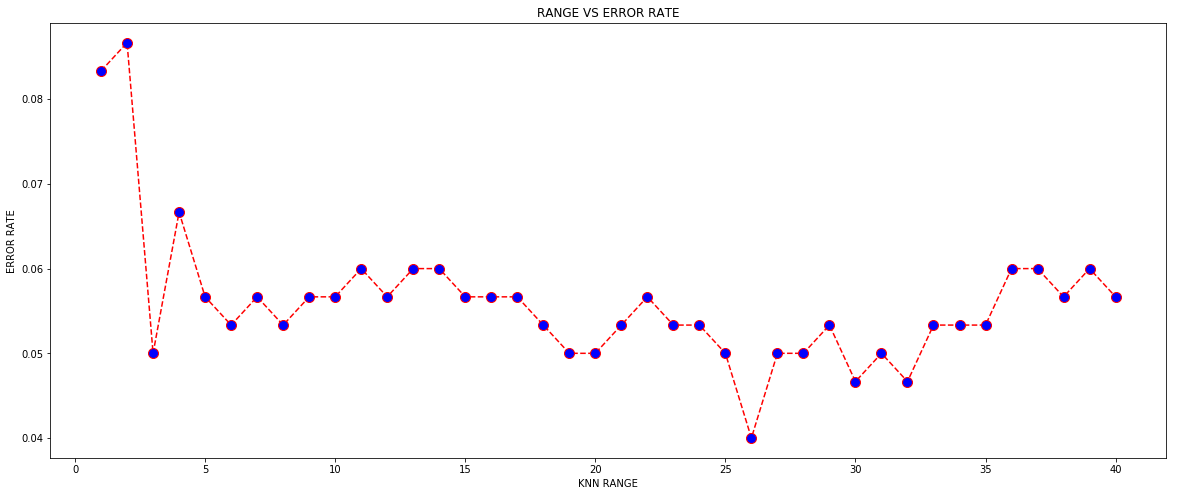

In [80]:
plt.figure(figsize=(20,8))
plt.plot(range(1,41),error_rate,color='red',linestyle='--',marker='o',markersize=10,markerfacecolor='blue')
plt.title("RANGE VS ERROR RATE")
plt.xlabel("KNN RANGE")
plt.ylabel("ERROR RATE")

In [82]:
knn=KNeighborsClassifier(n_neighbors=26)
knn.fit(x_train,y_train)
predicted_3=knn.predict(x_test)
print(confusion_matrix(y_test,predicted_3))
print(classification_report(y_test,predicted_3))

[[134   8]
 [  4 154]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       142
           1       0.95      0.97      0.96       158

   micro avg       0.96      0.96      0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

